<a href="https://www.kaggle.com/code/yacharki/your-own-personal-progression-dashboard?scriptVersionId=195182530" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

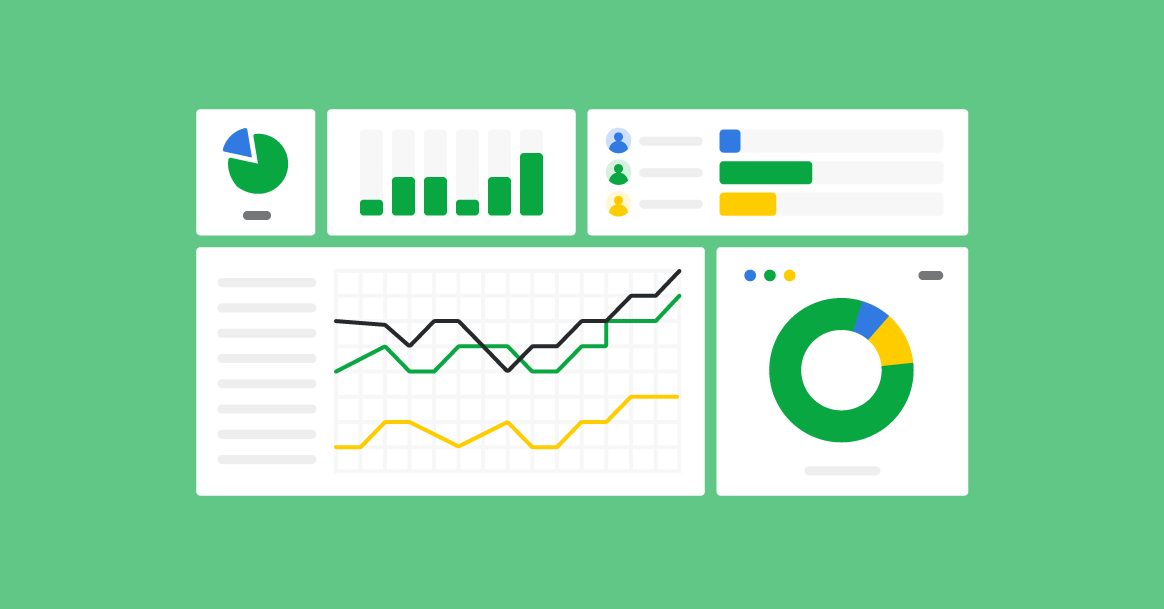

1. Import **libraries** and **datasets** 
2. Retreiving **AuthorUserId**
3. Displaying User **Acheivement**
4. Displaying User **Kernels**
5. Displaying User **Kernels Vs Up-Votes**
6. Displaying User **Kernel Up-Votes Histort (only the days the user got up-votes)**
7. Displaying User **Kernels Vs Views**
9. Displaying **Datasets Vs TotalVotes**
10. Displaying **Datasets Vs TotalViews**
11. Displaying **Datasets Vs TotalDownloads**
12. Displaying User **Messages**
13. Displaying User **Messages Votes History**
14. Displaying User **Followers History (only the days the user got followers)**

# Enter your UserName Here :

In [1]:
#------> Enter Your User Name instead of mine >-----#
userName = 'yacharki'
#------> Enter Your User Name instead of mine >-----#

# 1. Import libraries and datasets

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from itertools import cycle, islice

In [3]:
#Colors
colors = cycle(['#6A4545', '#6B7A55', '#90B860', '#4CC26E', '#EDA84C', '#BCCC6D','#EC6346','#3979D3','#E95DA6'])

In [4]:
users = pd.read_csv('../input/meta-kaggle/Users.csv')
kernels = pd.read_csv('../input/meta-kaggle/Kernels.csv')
kernelVotes = pd.read_csv('../input/meta-kaggle/KernelVotes.csv')
datasets = pd.read_csv('../input/meta-kaggle/Datasets.csv')
datasetsVersions = pd.read_csv('../input/meta-kaggle/DatasetVersions.csv')
ForumMessages = pd.read_csv('../input/meta-kaggle/ForumMessages.csv')
ForumMessagesVotes = pd.read_csv('../input/meta-kaggle/ForumMessageVotes.csv')
Acheivements = pd.read_csv('../input/meta-kaggle/UserAchievements.csv')
Followers = pd.read_csv('../input/meta-kaggle/UserFollowers.csv')

# 2. Retreiving AuthorUserId

In [5]:
CurrentUser = users[users['UserName'] == userName]
CurrentUser = CurrentUser['Id']
CurrentUser = CurrentUser.item()

# 3. Displaying User Acheivement

In [6]:
Acheivements = Acheivements[Acheivements['UserId'] == CurrentUser]
Acheivementsol = Acheivements[['UserId','AchievementType', 'Tier' , 'TierAchievementDate' ,'CurrentRanking']]
Acheivementsol

,UserId,AchievementType,Tier,TierAchievementDate,CurrentRanking
36832172,10030651,Discussion,3,07/24/2024,17.0
36832173,10030651,Datasets,2,05/25/2022,241.0
36832174,10030651,Competitions,1,04/25/2022,NaN
36833261,10030651,Scripts,3,01/16/2023,441.0


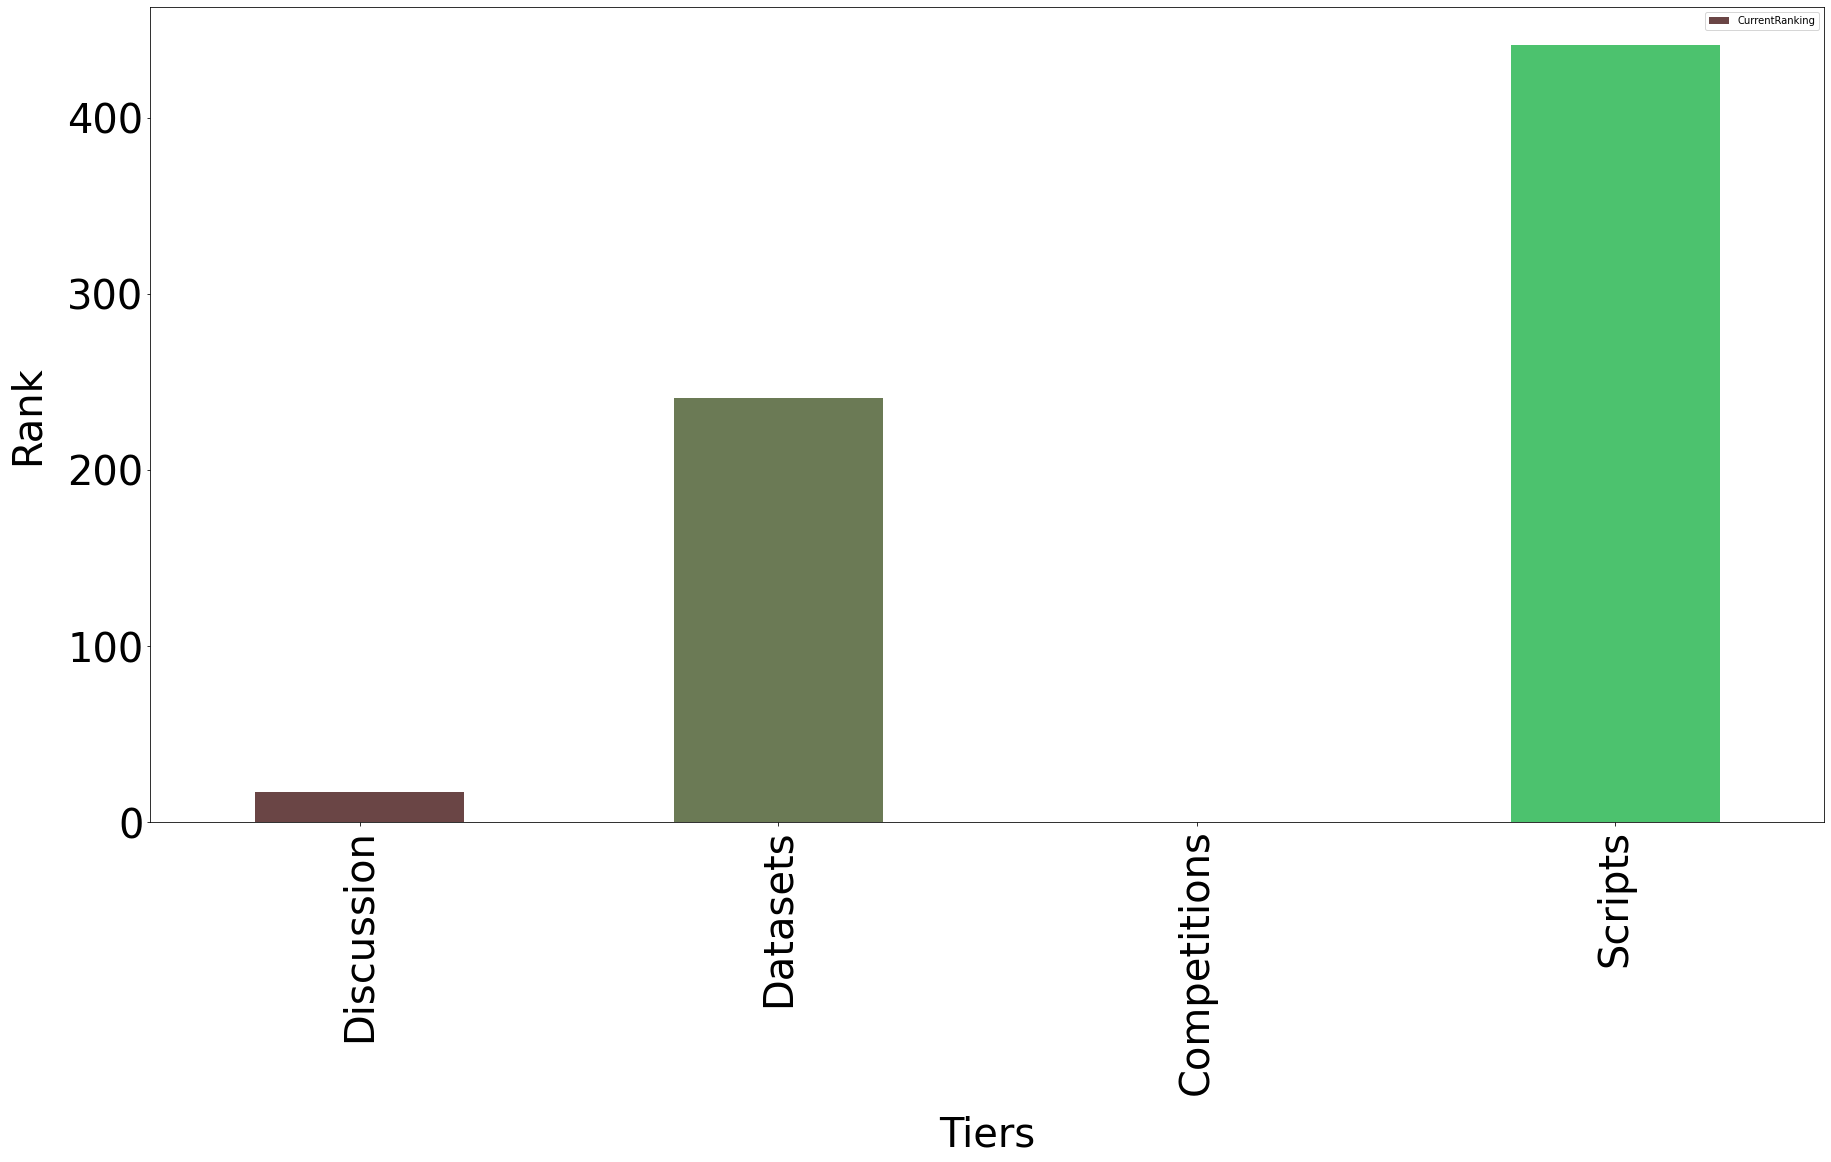

<Figure size 432x288 with 0 Axes>

In [7]:
my_colors = list(islice(colors, None, len(Acheivementsol)))
Acheivementsol.plot.bar(x='AchievementType', y='CurrentRanking', rot=90 , figsize=(30,15), color=my_colors)

plt.xlabel('Tiers', fontsize=40, labelpad=20)
plt.ylabel('Rank', fontsize=40, labelpad=20)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

fig = plt.figure()

plt.show()

# 4. Displaying User Kernels

In [8]:
CurrentUserKernels = kernels[kernels['AuthorUserId'] == CurrentUser]
CurrentUserKernelsVotes = kernelVotes[kernelVotes['UserId'] == CurrentUser]

CurrentUserKernels = CurrentUserKernels[['CurrentUrlSlug','TotalVotes', 'TotalViews']]
CurrentUserKernelsSorted = CurrentUserKernels.sort_values(by='TotalVotes')
CurrentUserKernelsSorted

,CurrentUrlSlug,TotalVotes,TotalViews
1170036,training-testing-the-yelp-model,10,283
1141539,kaggle-grandmasters-by-country,10,270
1170006,training-testing-the-amazon-model,10,655
1143918,kaggle-masters-grandmasters-by-country,16,132
744950,10-classs-yahoo-answers-47-lstm,37,652
744857,5-classs-text-classification-movies-66-lstm,42,587
745772,your-own-personal-notebooks-dashboard,42,267
718507,5-class-classification-amazon-reviews-41-lstm,42,446
718464,projet-tipe-classification-des-d-chets-resnet,45,2668
745023,10-classses-yahoo-answers-41-cnn,46,812


# 5. Displaying User Kernels Vs Up-Votes

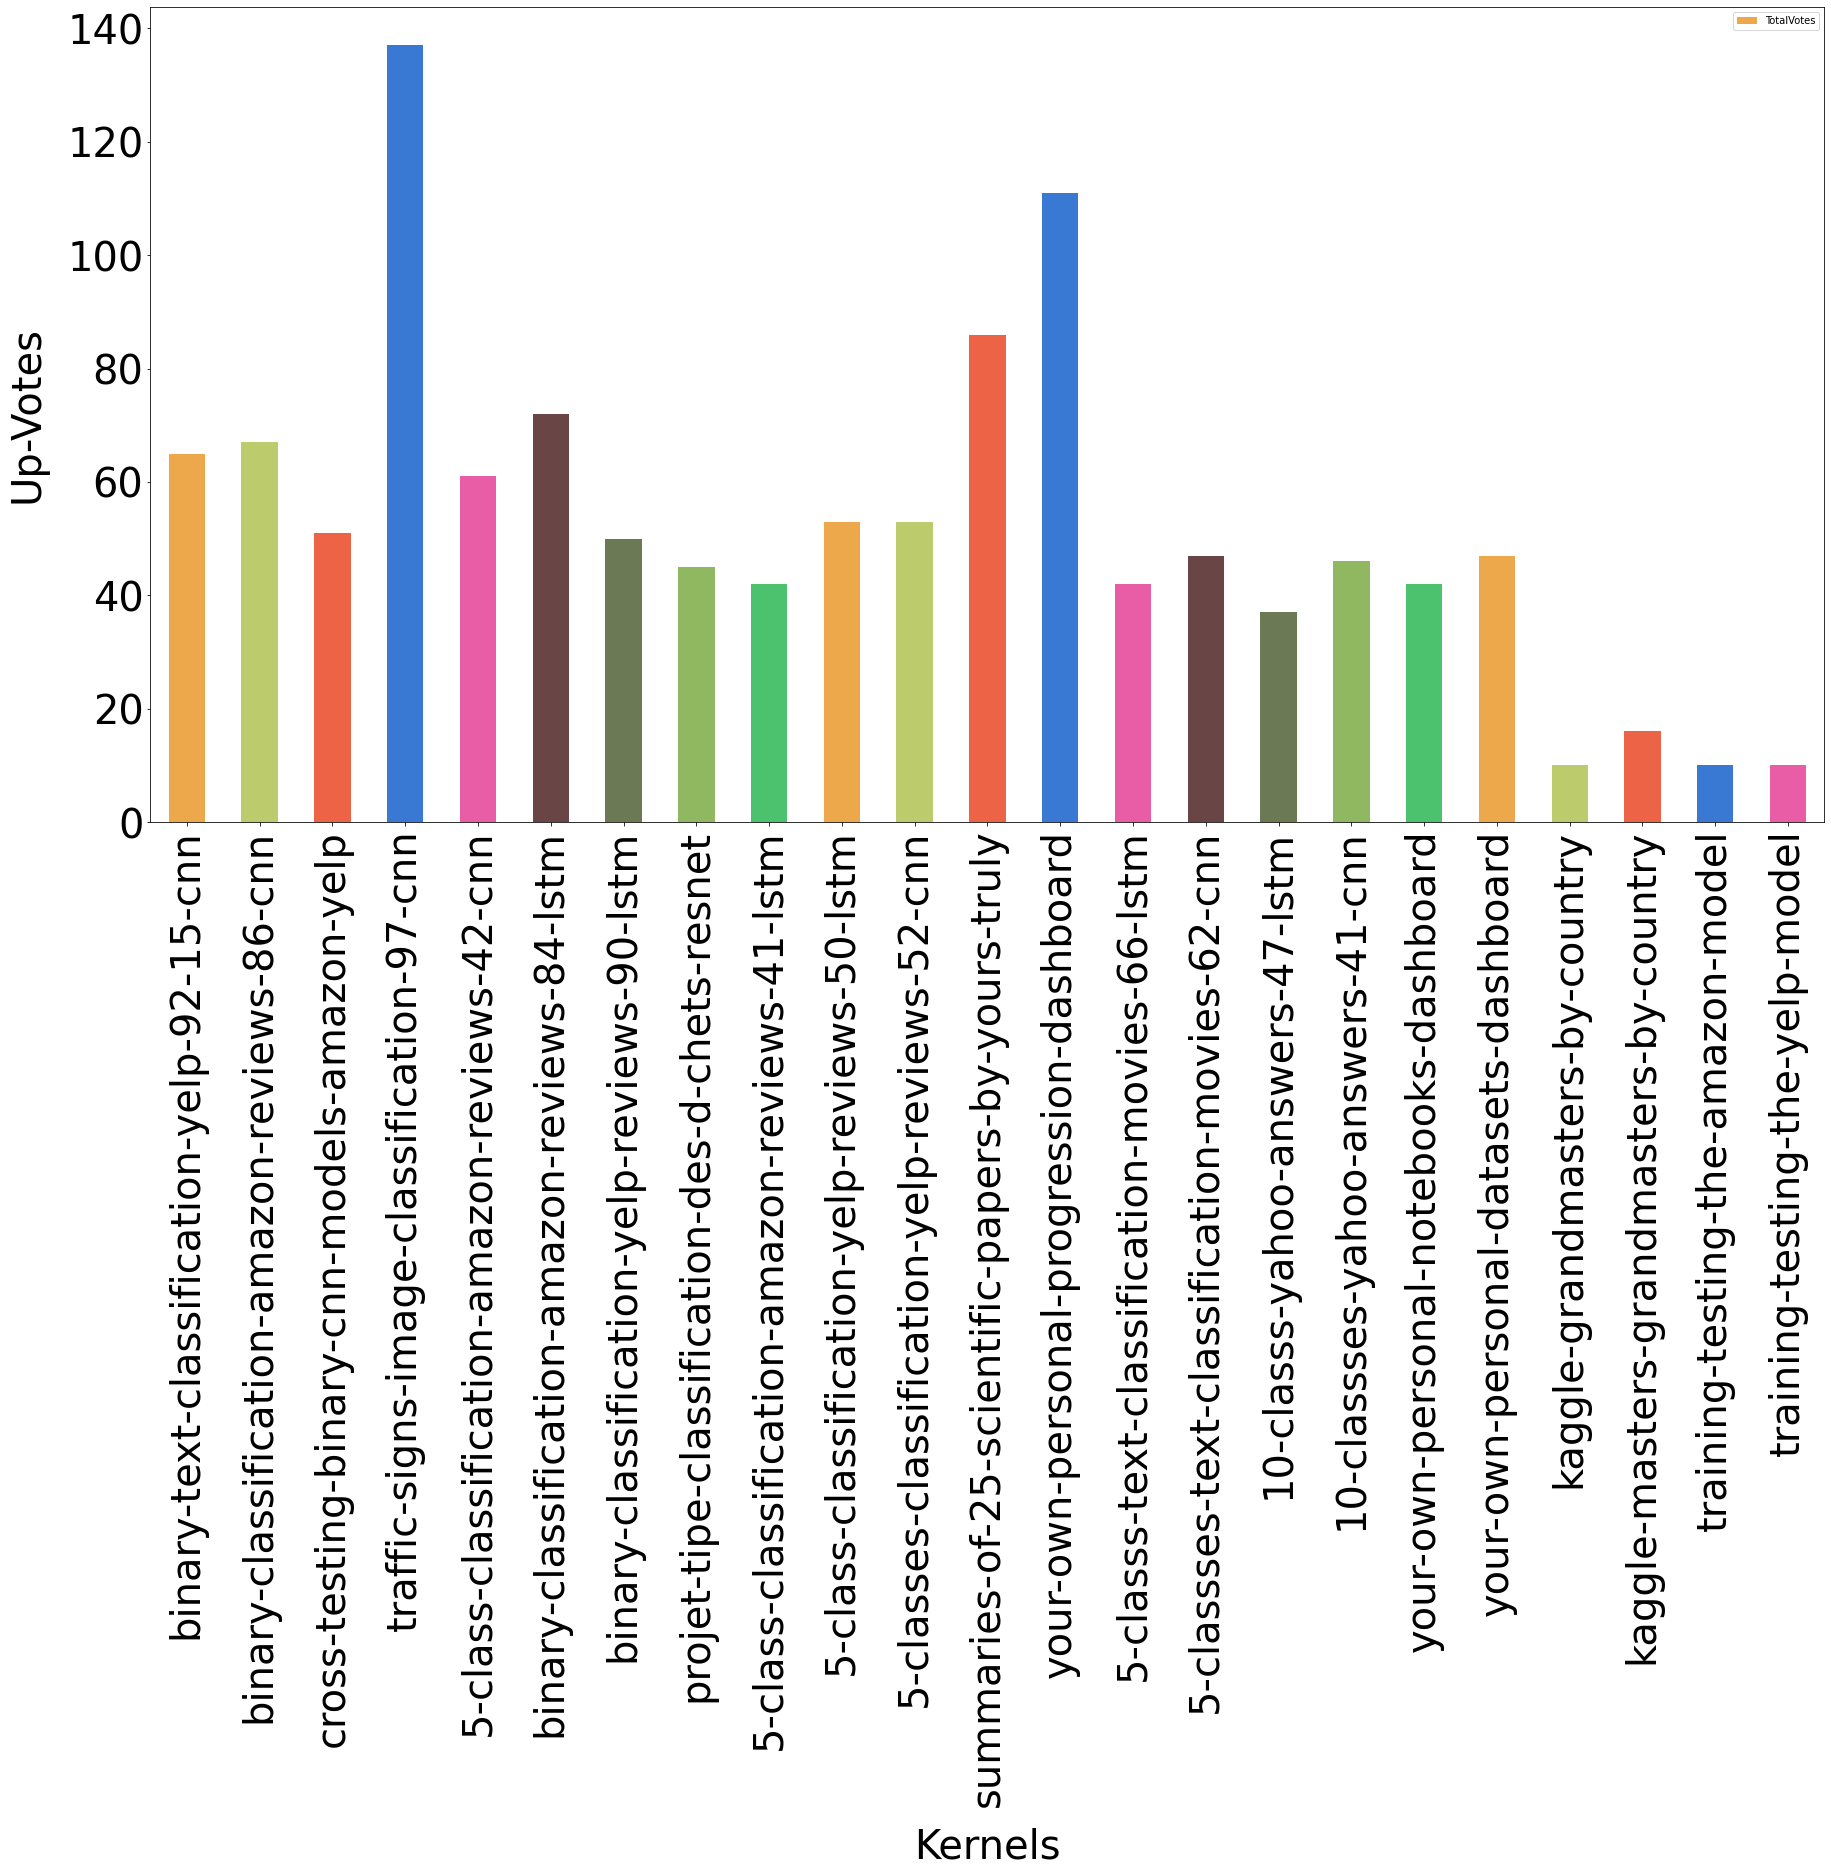

<Figure size 432x288 with 0 Axes>

In [9]:
my_colors = list(islice(colors, None, len(CurrentUserKernels)))
CurrentUserKernels.plot.bar(x='CurrentUrlSlug', y='TotalVotes', rot=90 , figsize=(30,15), color=my_colors)

plt.xlabel('Kernels', fontsize=40, labelpad=20)
plt.ylabel('Up-Votes', fontsize=40, labelpad=20)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

fig = plt.figure()

plt.show()

# 6. Displaying User Kernel Up-Votes (only the days the user got up-votes)

In [10]:
RIP = CurrentUserKernelsVotes[['VoteDate']]
RIPSorted = RIP.sort_values(by='VoteDate')

In [11]:
List = RIPSorted['VoteDate'].values

VoteDateDF = pd.DataFrame(columns = ["VoteDate", "Count"])

CurrentDate=''
LogDate=''
Count=0
FirstTime = True

for value in List:
    if FirstTime==True:
        CurrentDate = value
        LogDate = CurrentDate
        Count = Count +1
        FirstTime=False
    else:
        if LogDate == value:
            Count = Count +1
        else:
            VoteDateDF = VoteDateDF.append({'VoteDate': LogDate, 'Count': Count}, ignore_index=True)
            CurrentDate = value
            LogDate = CurrentDate
            Count = 1
    
    

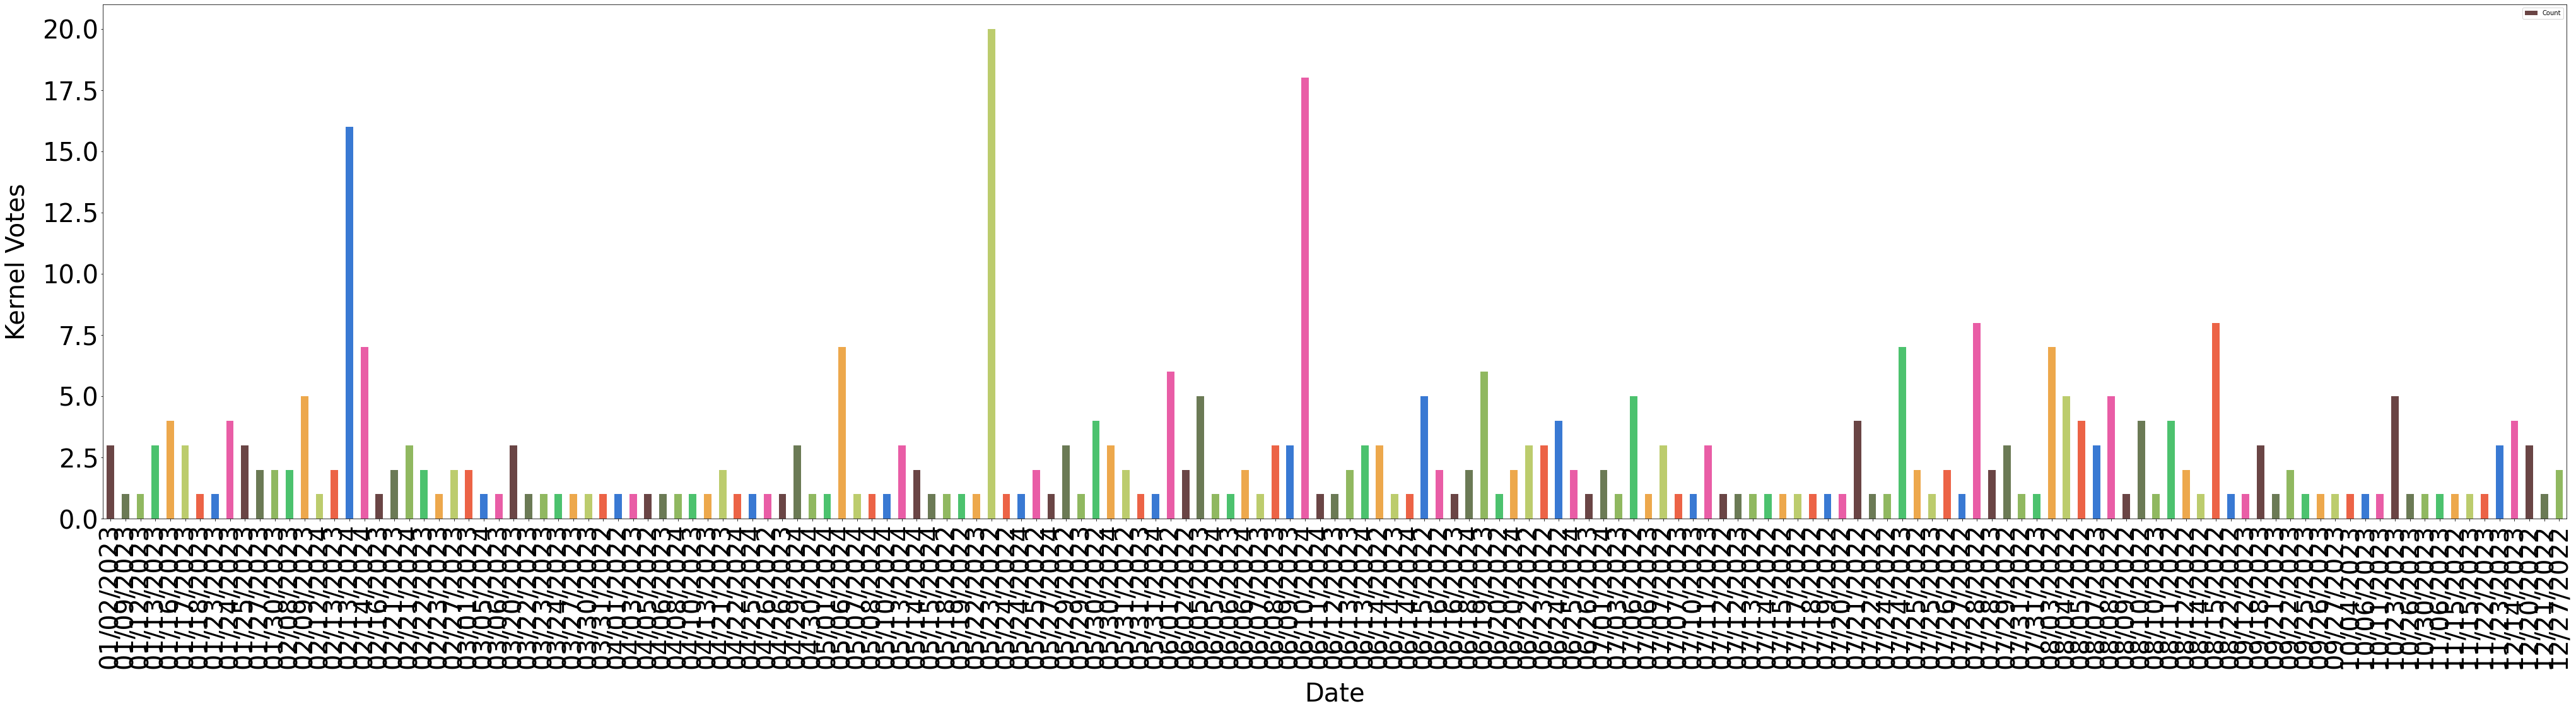

In [12]:
my_colors = list(islice(colors, None, len(VoteDateDF)))
VoteDateDF.plot.bar(x="VoteDate", y="Count", rot=90 , figsize=(70,15), color=my_colors)

plt.xlabel('Date', fontsize=40, labelpad=20)
plt.ylabel('Kernel Votes', fontsize=40, labelpad=20)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.show()

# 7. Displaying User Kernels Vs Views

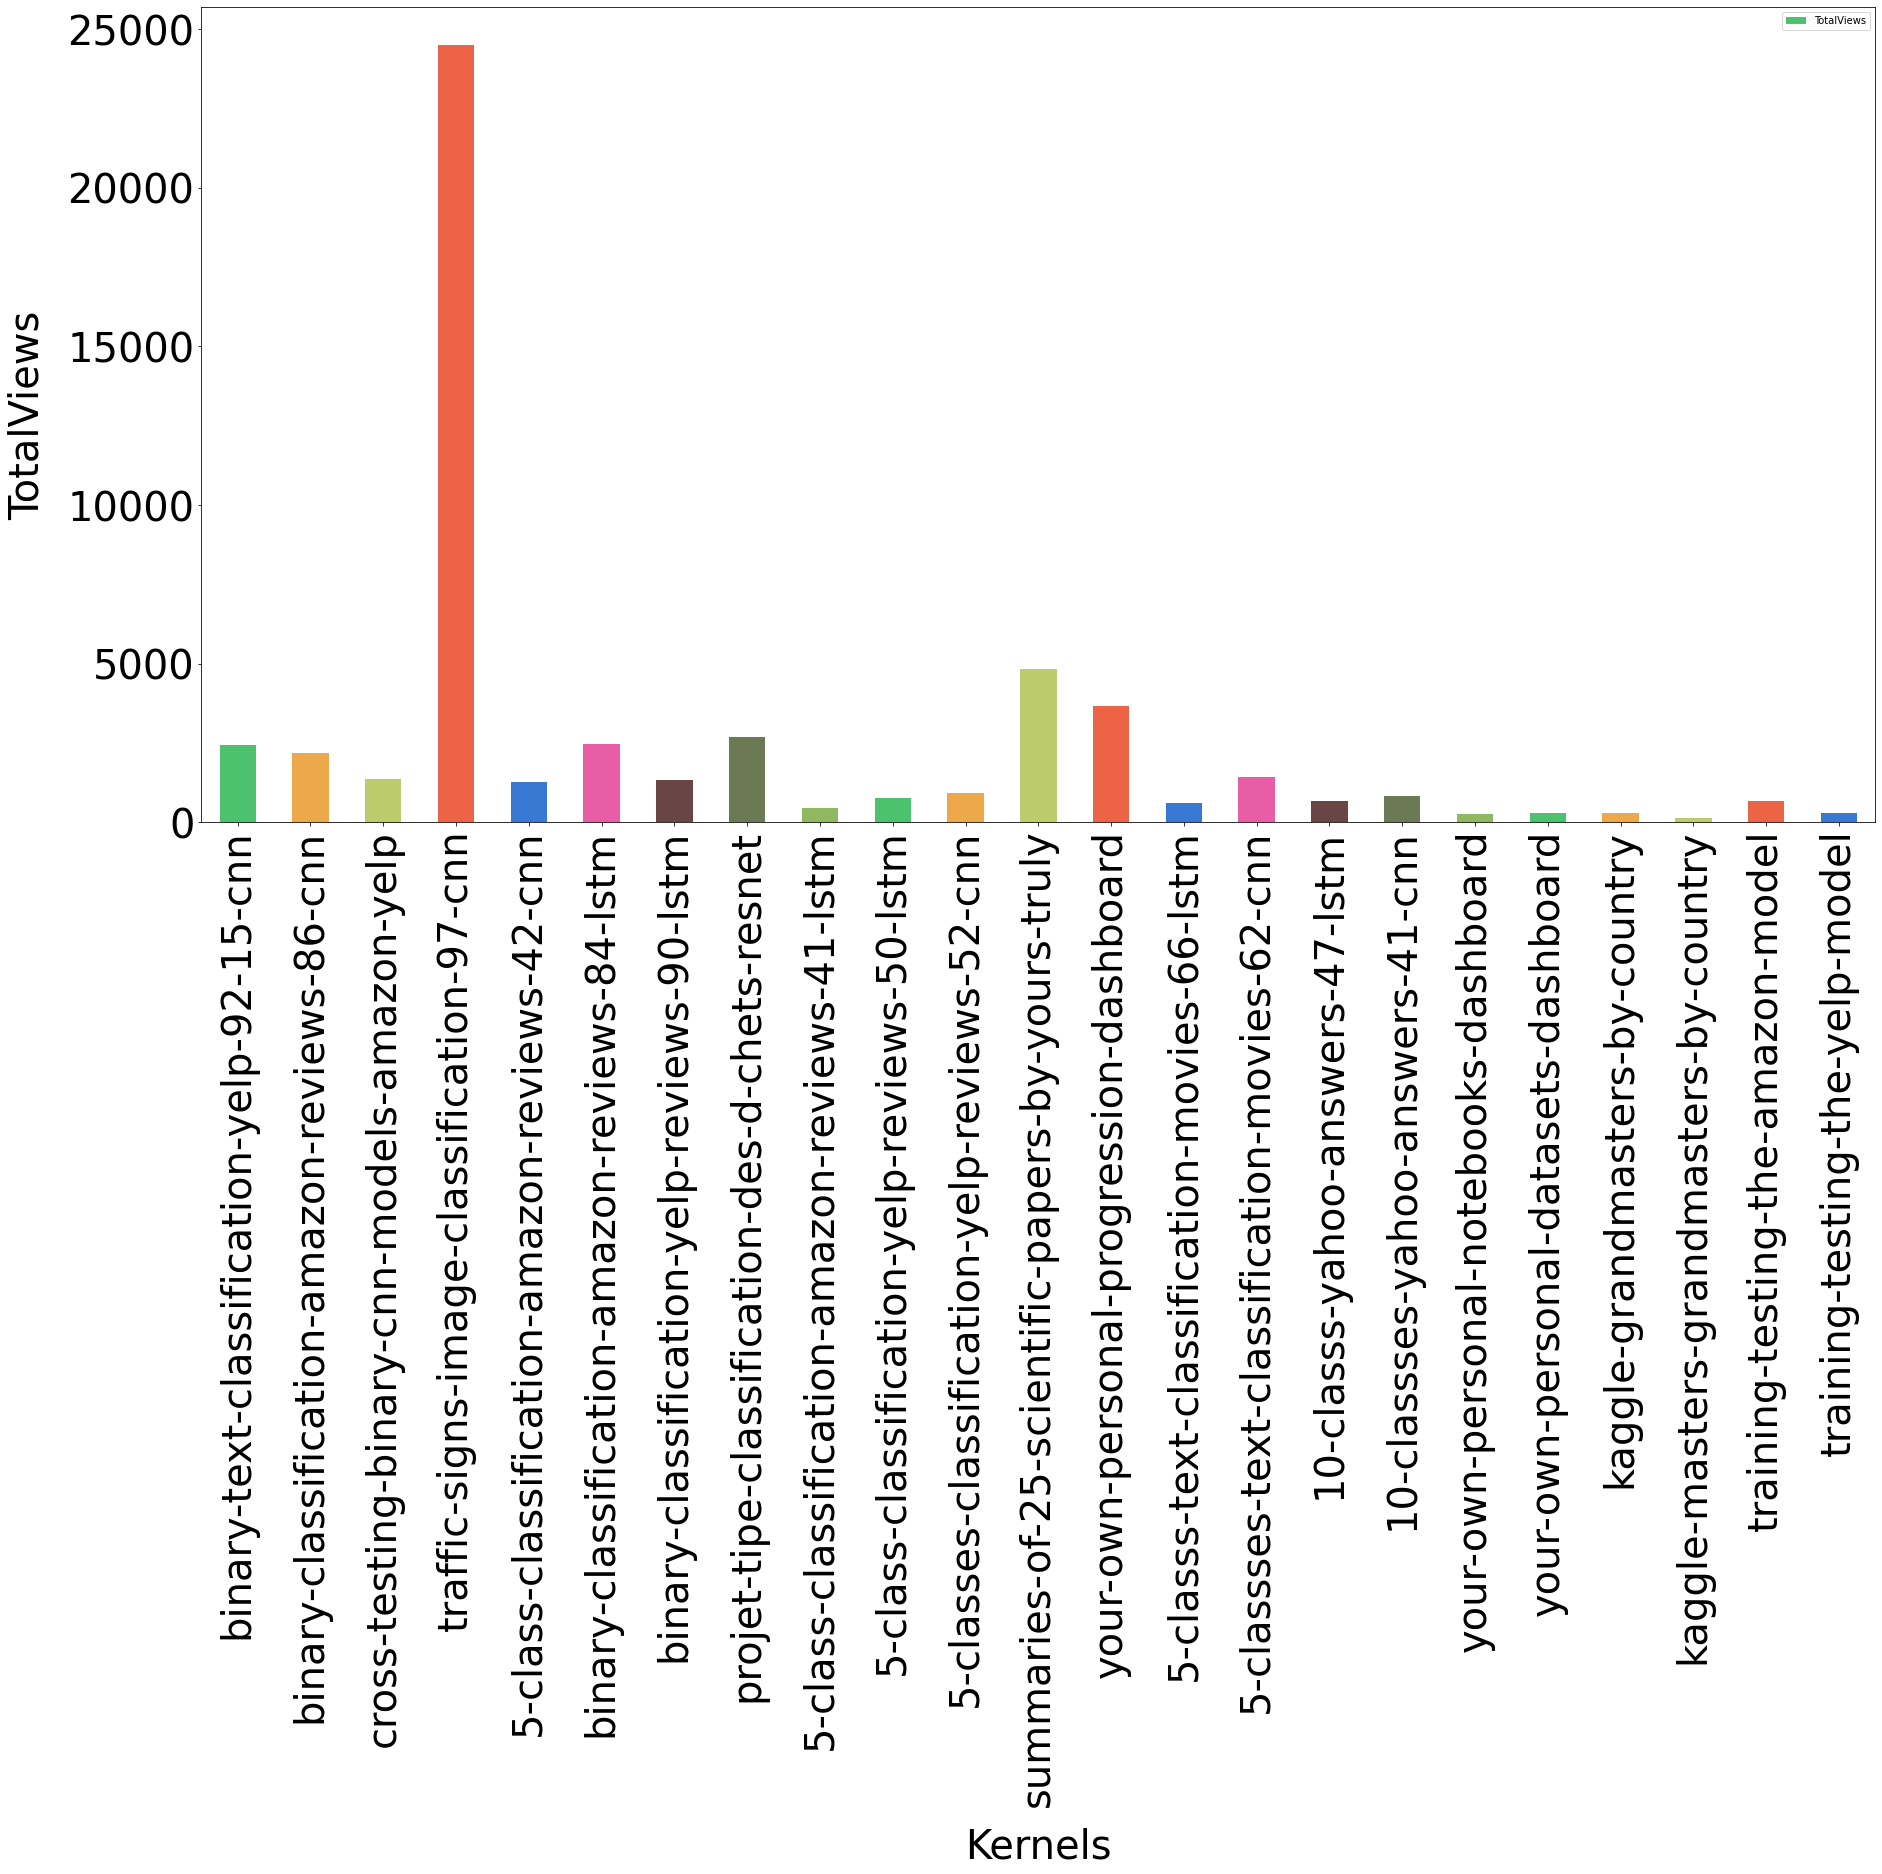

<Figure size 432x288 with 0 Axes>

In [13]:
my_colors = list(islice(colors, None, len(CurrentUserKernels)))
CurrentUserKernels.plot.bar(x='CurrentUrlSlug', y='TotalViews', rot=90 , figsize=(30,15), color=my_colors)

plt.xlabel('Kernels', fontsize=40, labelpad=20)
plt.ylabel('TotalViews', fontsize=40, labelpad=20)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

fig = plt.figure()

plt.show()

# 8. Displaying User Datasets 

In [14]:
Datasets = datasets[datasets['CreatorUserId'] == CurrentUser]
CurrentUserDatasets = Datasets[['Id','CreationDate', 'TotalViews', 'TotalDownloads', 'TotalVotes']]
CurrentUserDatasets = CurrentUserDatasets.sort_values(by=['CreationDate'])

CurrentUserDatasetsV = datasetsVersions[datasetsVersions['CreatorUserId'] == CurrentUser]
CurrentUserDatasetsV = CurrentUserDatasetsV.sort_values(by=['CreationDate'])
CurrentUserDatasetsV = CurrentUserDatasetsV.drop_duplicates(subset='Slug', keep='first')
result = CurrentUserDatasetsV[['Slug']]

cp = result['Slug'].values
FResult = CurrentUserDatasets.assign(Slug=cp)
FResult

,Id,CreationDate,TotalViews,TotalDownloads,TotalVotes,Slug
154056,2042573,03/31/2022 14:44:26,1060,48,28,yelp-reviews-for-sa-finegrained-5-classes-csv
143692,2074291,04/11/2022 13:46:03,4290,699,28,amazon-reviews-for-sa-binary-negative-positive...
139116,2078011,04/12/2022 15:34:08,5017,745,40,binary-classification-model-amazon-reviews-86pt
142240,2078107,04/12/2022 16:05:12,2640,322,27,glove-twitter-27b-25d-50d-100d-200d-42b-300d
142515,2078159,04/12/2022 16:28:02,1436,362,23,manon-str-cleaned-dataset
142516,2078210,04/12/2022 16:49:03,2995,390,54,yahoo-answers-10-categories-for-nlp-csv
320168,4913117,04/30/2024 16:57:03,2466,215,35,movie-review-sentiment-analysis
335873,4931258,05/03/2024 12:18:04,230,20,13,amazon-reviews-for-sentianalysis-finegrained-csv
155101,2161729,05/09/2022 14:57:40,1284,67,32,yelp-reviews-for-sentianalysis-binary-np-csv
157981,2161756,05/09/2022 15:06:50,982,44,22,grandmasters-by-country-04302024


# 9. Displaying Datasets Vs TotalVotes

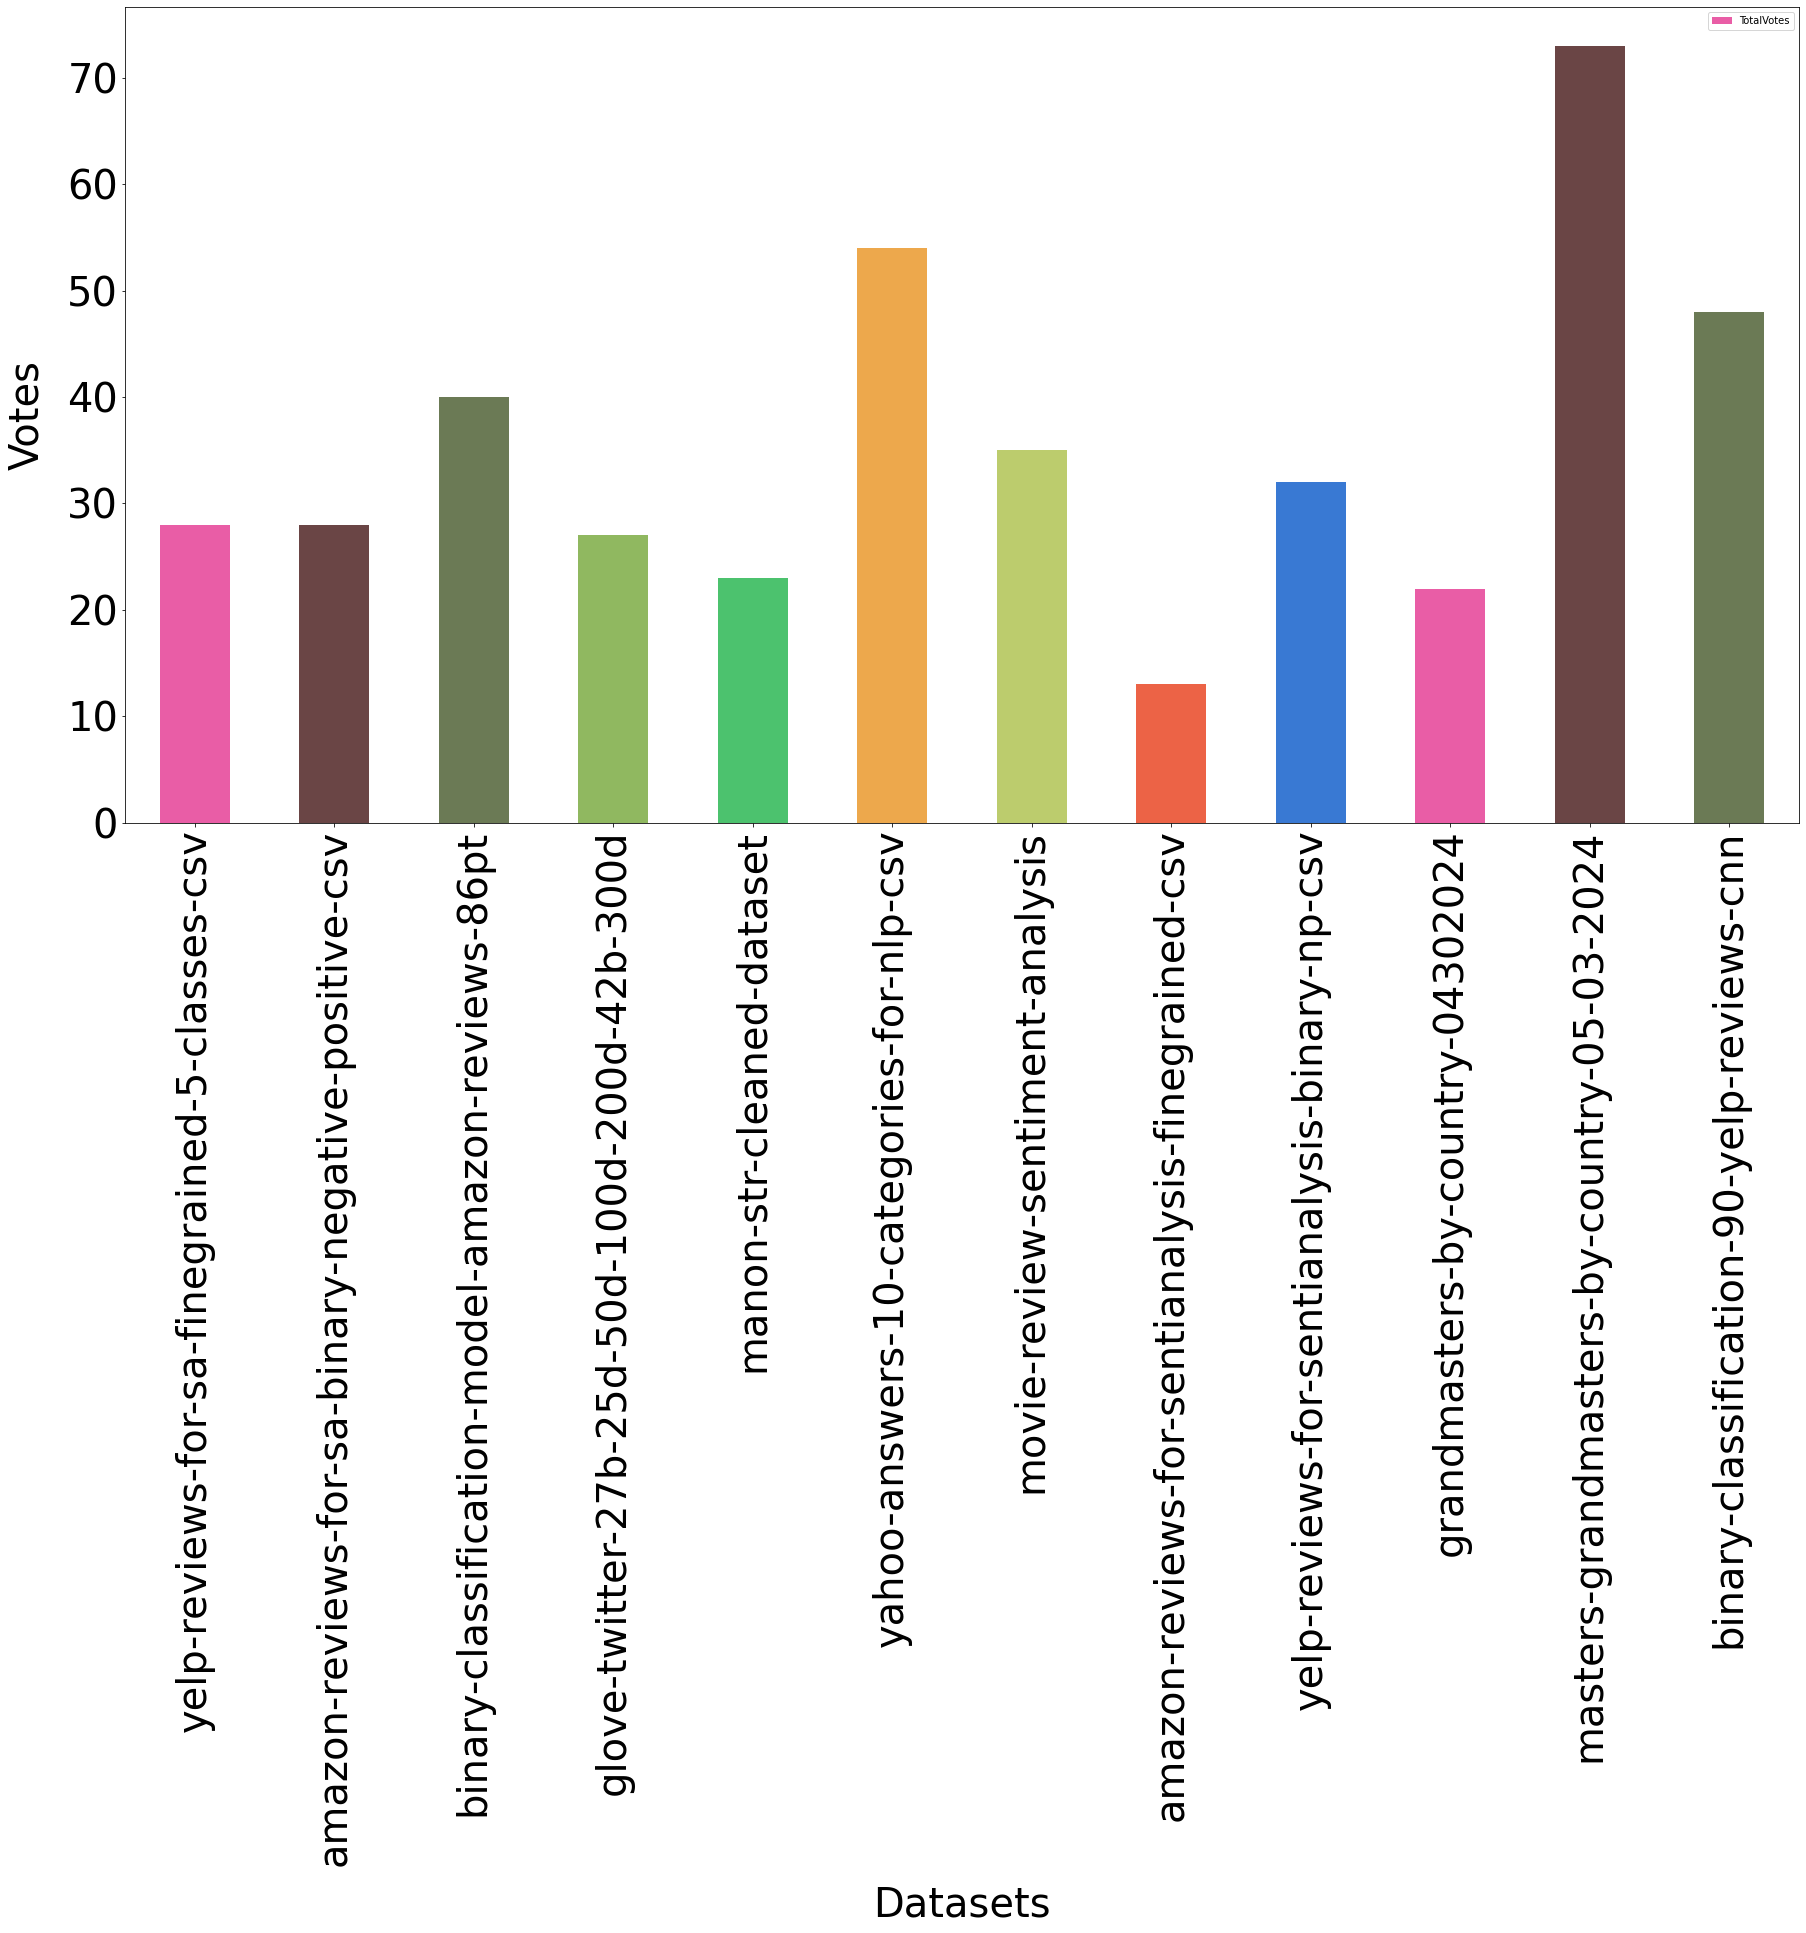

<Figure size 432x288 with 0 Axes>

In [15]:
my_colors = list(islice(colors, None, len(FResult)))
FResult.plot.bar(x='Slug', y='TotalVotes', rot=90 , figsize=(30,15), color=my_colors)

plt.xlabel('Datasets', fontsize=40, labelpad=20)
plt.ylabel('Votes', fontsize=40, labelpad=20)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

fig = plt.figure()

plt.show()

# 10. Displaying Datasets Vs TotalViews

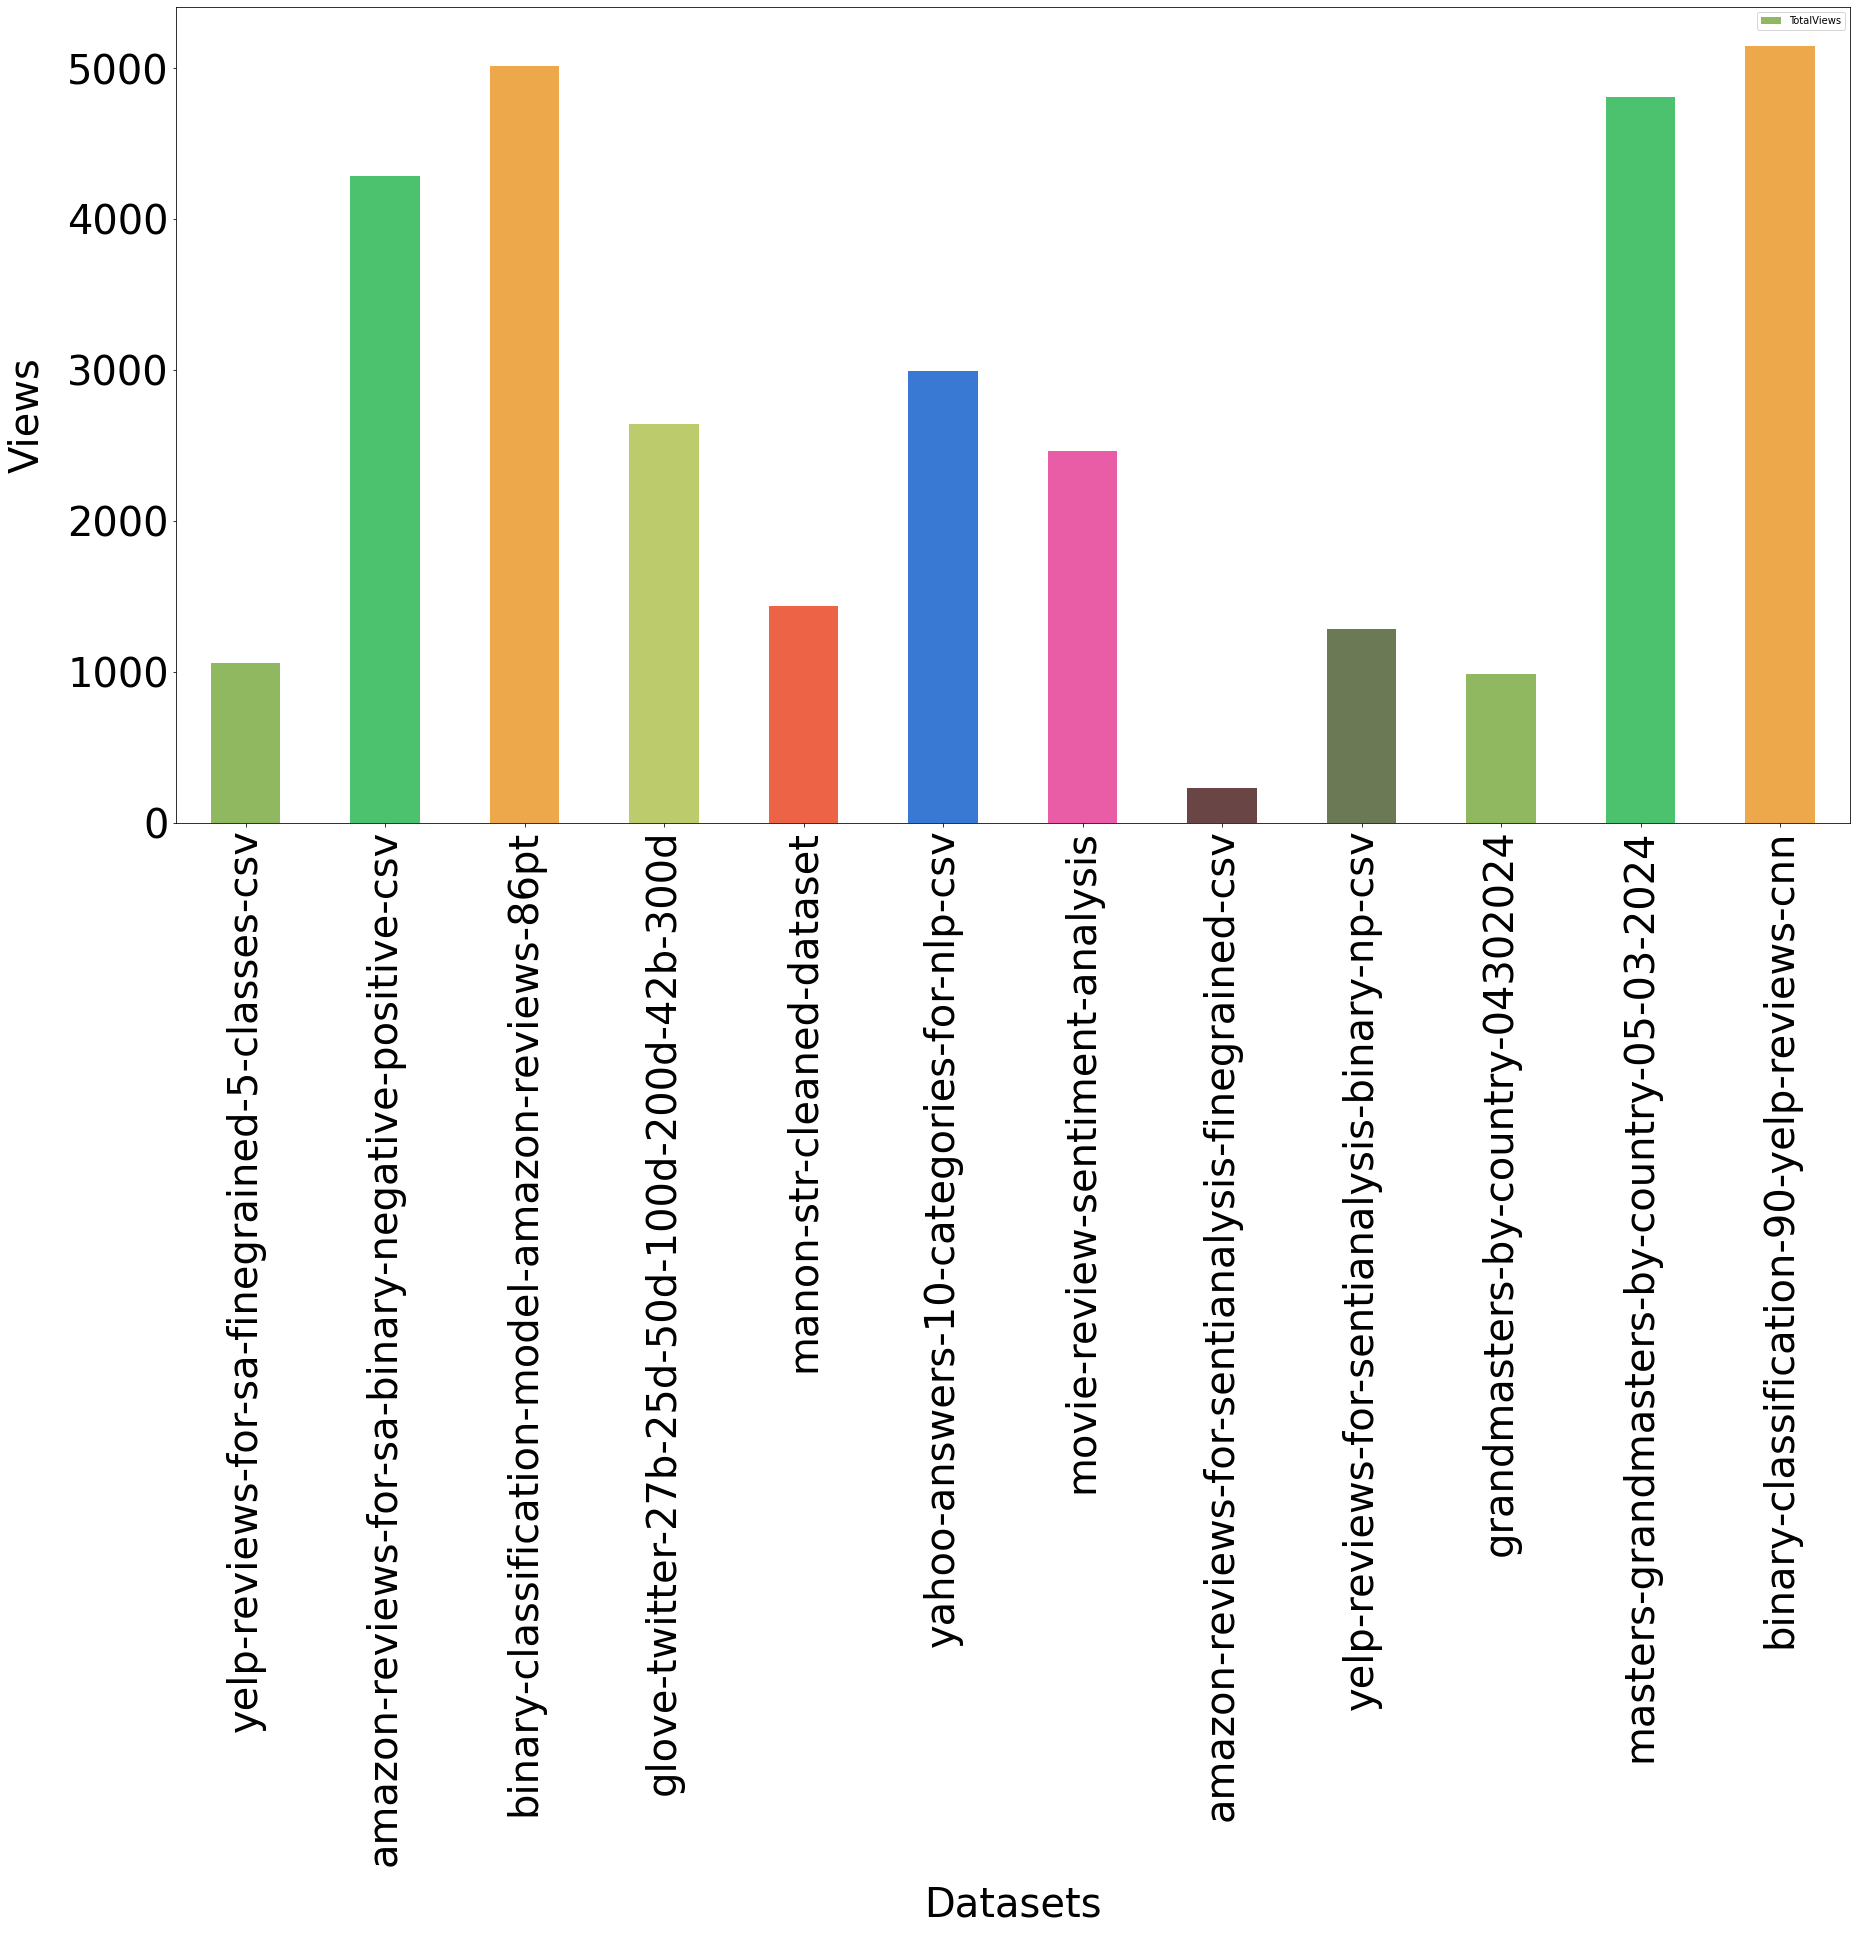

<Figure size 432x288 with 0 Axes>

In [16]:
my_colors = list(islice(colors, None, len(FResult)))
FResult.plot.bar(x='Slug', y='TotalViews', rot=90 , figsize=(30,15), color=my_colors)

plt.xlabel('Datasets', fontsize=40, labelpad=20)
plt.ylabel('Views', fontsize=40, labelpad=20)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

fig = plt.figure()

plt.show()

# 11. Displaying Datasets Vs TotalDownloads

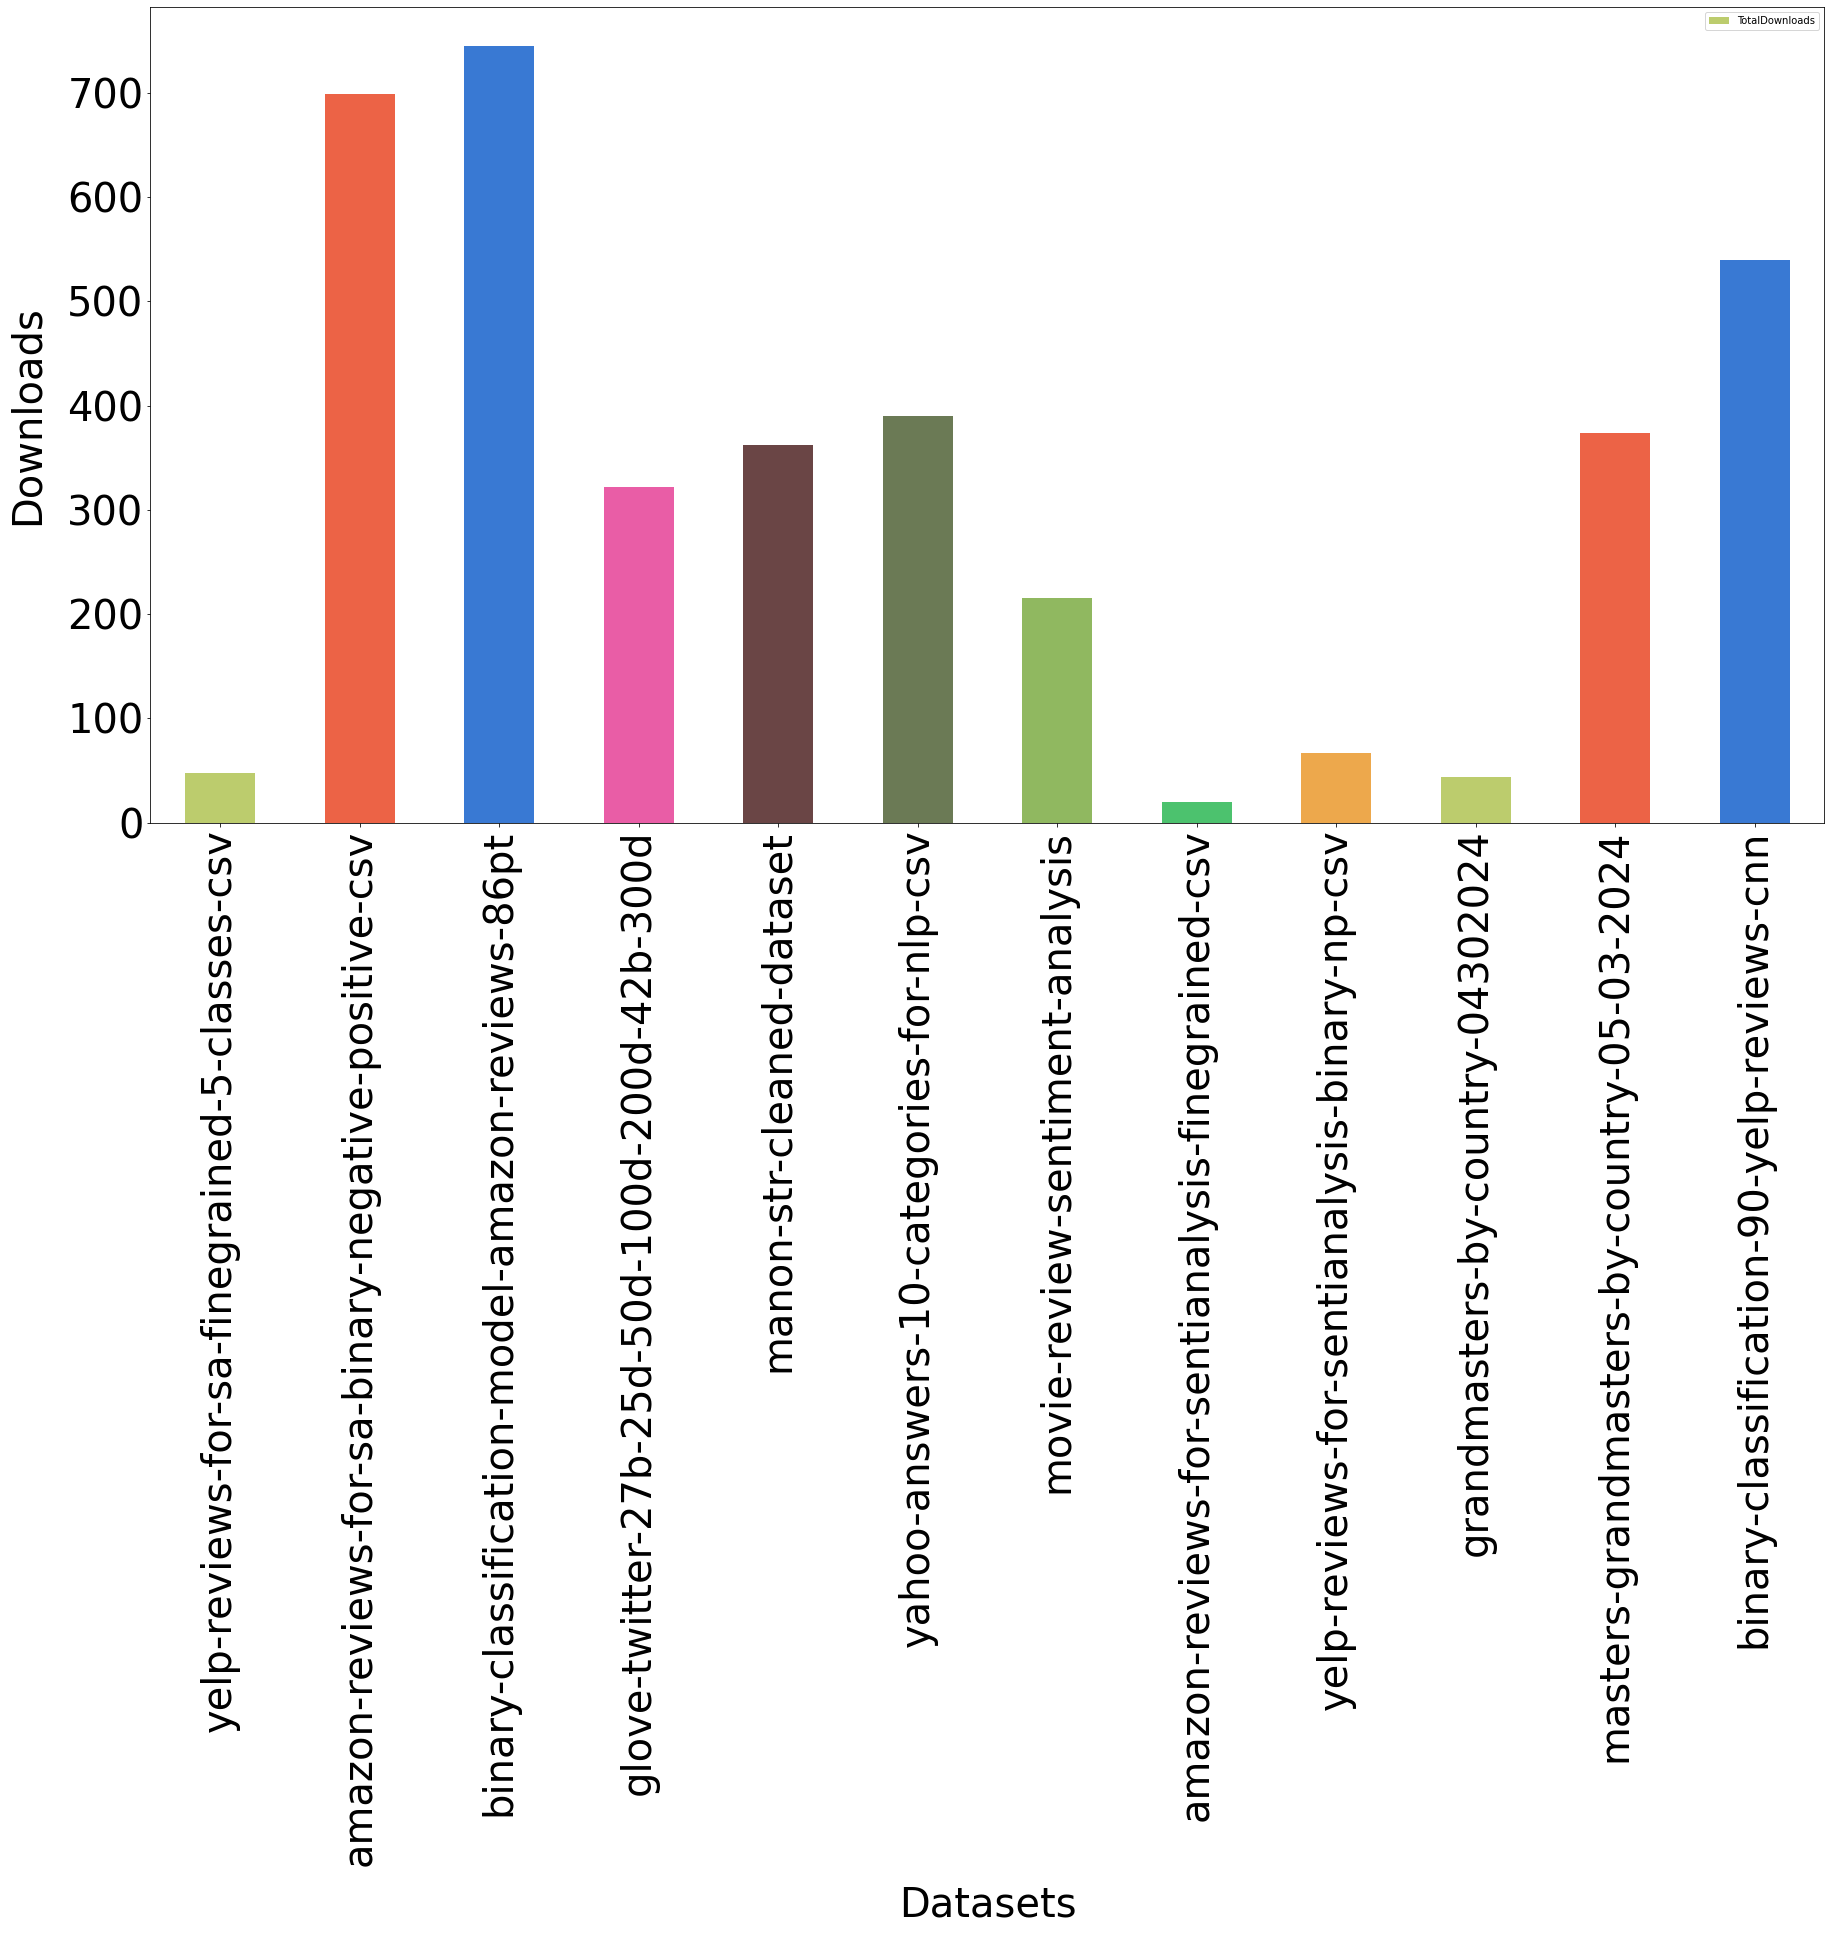

<Figure size 432x288 with 0 Axes>

In [17]:
my_colors = list(islice(colors, None, len(FResult)))
FResult.plot.bar(x='Slug', y='TotalDownloads', rot=90 , figsize=(30,15), color=my_colors)

plt.xlabel('Datasets', fontsize=40, labelpad=20)
plt.ylabel('Downloads', fontsize=40, labelpad=20)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

fig = plt.figure()

plt.show()

# 12. Displaying User Messages

In [18]:
ForumMessagesS = ForumMessages[ForumMessages['PostUserId'] == CurrentUser]
ForumMessagesS = ForumMessagesS[['PostUserId','ForumTopicId', 'PostDate' , 'Message']]
ForumMessagesS

,PostUserId,ForumTopicId,PostDate,Message
919410,10030651,316189,03/31/2022 17:19:34,<p>[Useful for Sentiment Analysis]</p>\n<p>I u...
920872,10030651,310576,03/29/2022 18:51:40,<p>i hope my friends in ukraine are okay.</p>
922522,10030651,132033,04/04/2022 10:36:59,"<p>it's still not available, I'm removing my u..."
1068902,10030651,348487,08/29/2022 08:22:39,"<p>Tableau is very useful thanks <a href=""http..."
1071890,10030651,346252,08/18/2022 15:45:41,"<blockquote>\n <p>Hi Everyone, </p>\n <p>I j..."
...,...,...,...,...
2498346,10030651,421014,07/03/2023 15:12:05,"<p>I can see the output problem here too, you ..."
2498354,10030651,421012,07/03/2023 15:10:32,"<p>Good work, you may want to add titles and a..."
2498359,10030651,406605,07/03/2023 15:09:08,"<p>Nice notebook, i liked the results and also..."
2498366,10030651,421011,07/03/2023 15:07:41,<p>you may want to consider disabling the outp...


# 13. Displaying User Messages Votes History

In [19]:
ForumMessagesV = ForumMessagesVotes[ForumMessagesVotes['ToUserId'] == CurrentUser]
ForumMessagesV = ForumMessagesV[['ToUserId','VoteDate']]

In [20]:
RIP = ForumMessagesV[['VoteDate']]
RIPSorted = RIP.sort_values(by='VoteDate')

List = RIPSorted['VoteDate'].values

VoteDateDF = pd.DataFrame(columns = ["VoteDate", "Count"])

CurrentDate=''
LogDate=''
Count=0
FirstTime = True

for value in List:
    if FirstTime==True:
        CurrentDate = value
        LogDate = CurrentDate
        Count = 1
        FirstTime=False
    else:
        if LogDate == value:
            Count = Count +1
            CurrentDate = value
            LogDate = CurrentDate
        else:
            VoteDateDF = VoteDateDF.append({'VoteDate': LogDate, 'Count': Count}, ignore_index=True)
            Count = 1
            CurrentDate = value
            LogDate = CurrentDate

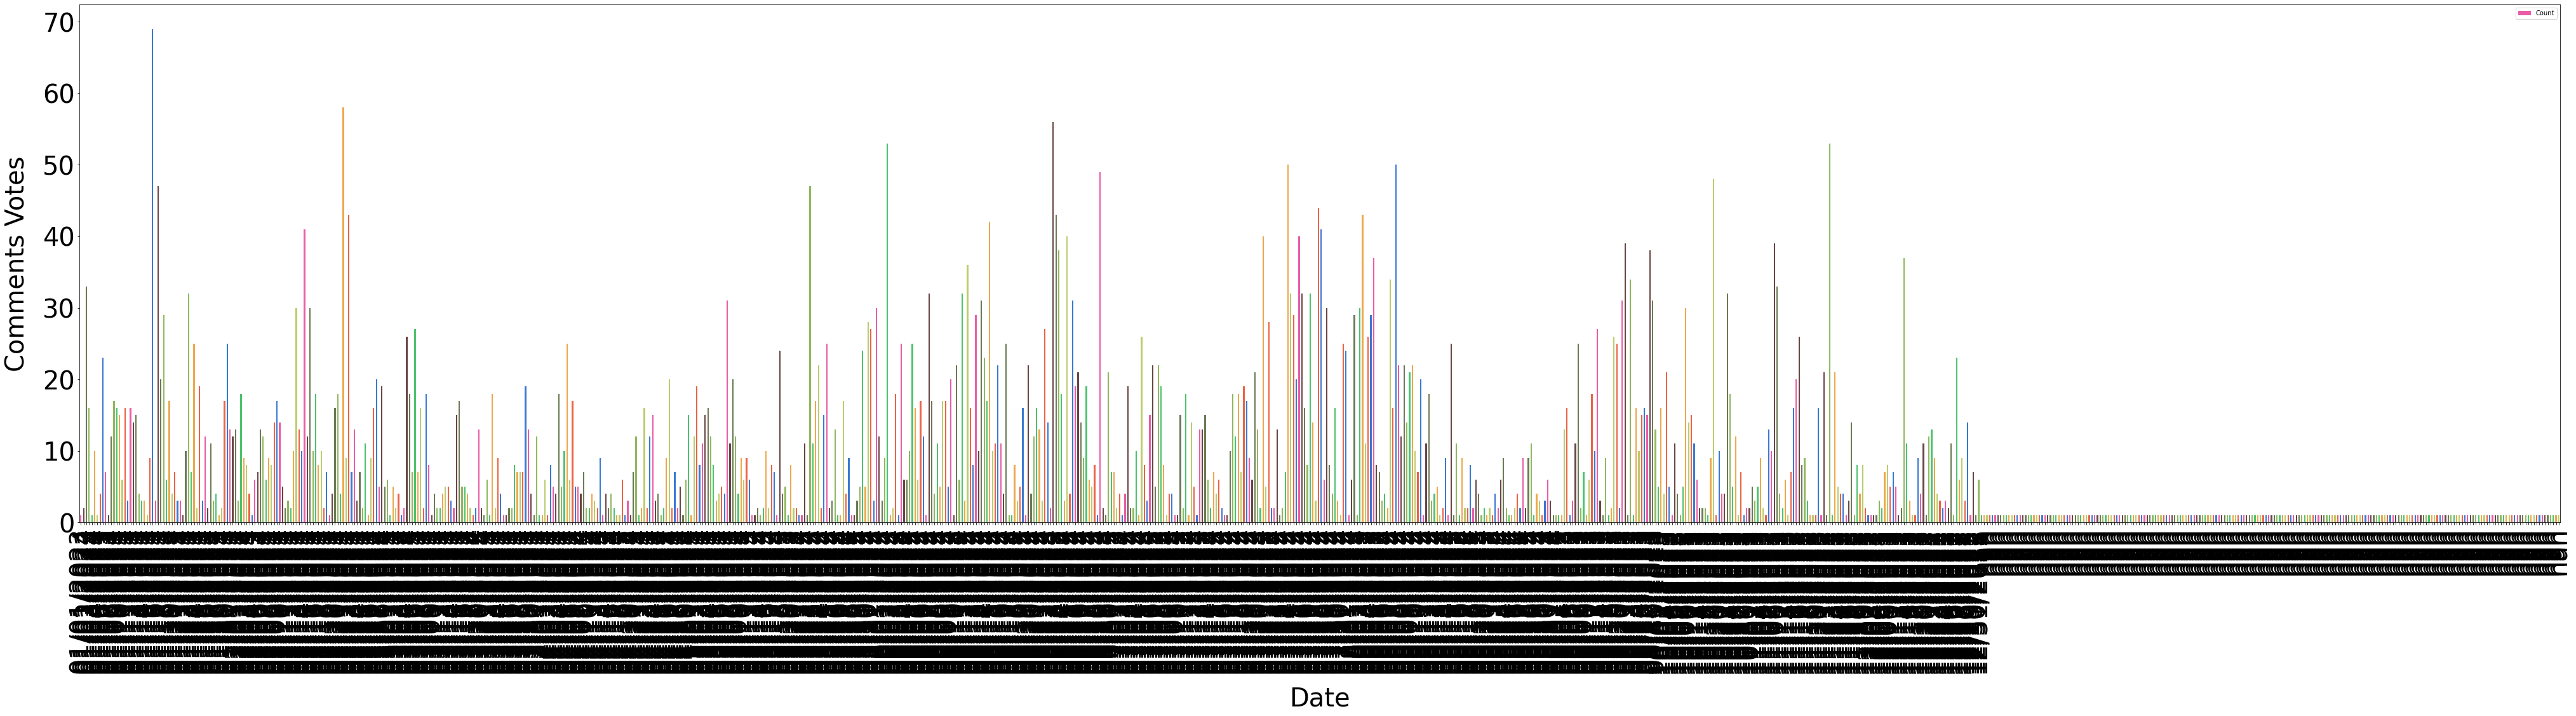

In [21]:
my_colors = list(islice(colors, None, len(VoteDateDF)))
VoteDateDF.plot.bar(x="VoteDate", y="Count", rot=90 , figsize=(70,15), color=my_colors)

plt.xlabel('Date', fontsize=40, labelpad=20)
plt.ylabel('Comments Votes', fontsize=40, labelpad=20)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.show()

# 14. Displaying User Followers History (only the days the user got followers)

In [22]:
Followers = Followers[Followers['FollowingUserId'] == CurrentUser]
FollowersL = Followers[['FollowingUserId','CreationDate']]

In [23]:
RIP = FollowersL[['CreationDate']]
RIPSorted = RIP.sort_values(by='CreationDate')

List = RIPSorted['CreationDate'].values

VoteDateDF = pd.DataFrame(columns = ["FollowDate", "Count"])

CurrentDate=''
LogDate=''
Count=0
FirstTime = True

for value in List:
    if FirstTime==True:
        CurrentDate = value
        LogDate = CurrentDate
        Count = 1
        FirstTime=False
    else:
        if LogDate == value:
            Count = Count +1
            CurrentDate = value
            LogDate = CurrentDate
        else:
            VoteDateDF = VoteDateDF.append({'FollowDate': LogDate, 'Count': Count}, ignore_index=True)
            Count = 1
            CurrentDate = value
            LogDate = CurrentDate

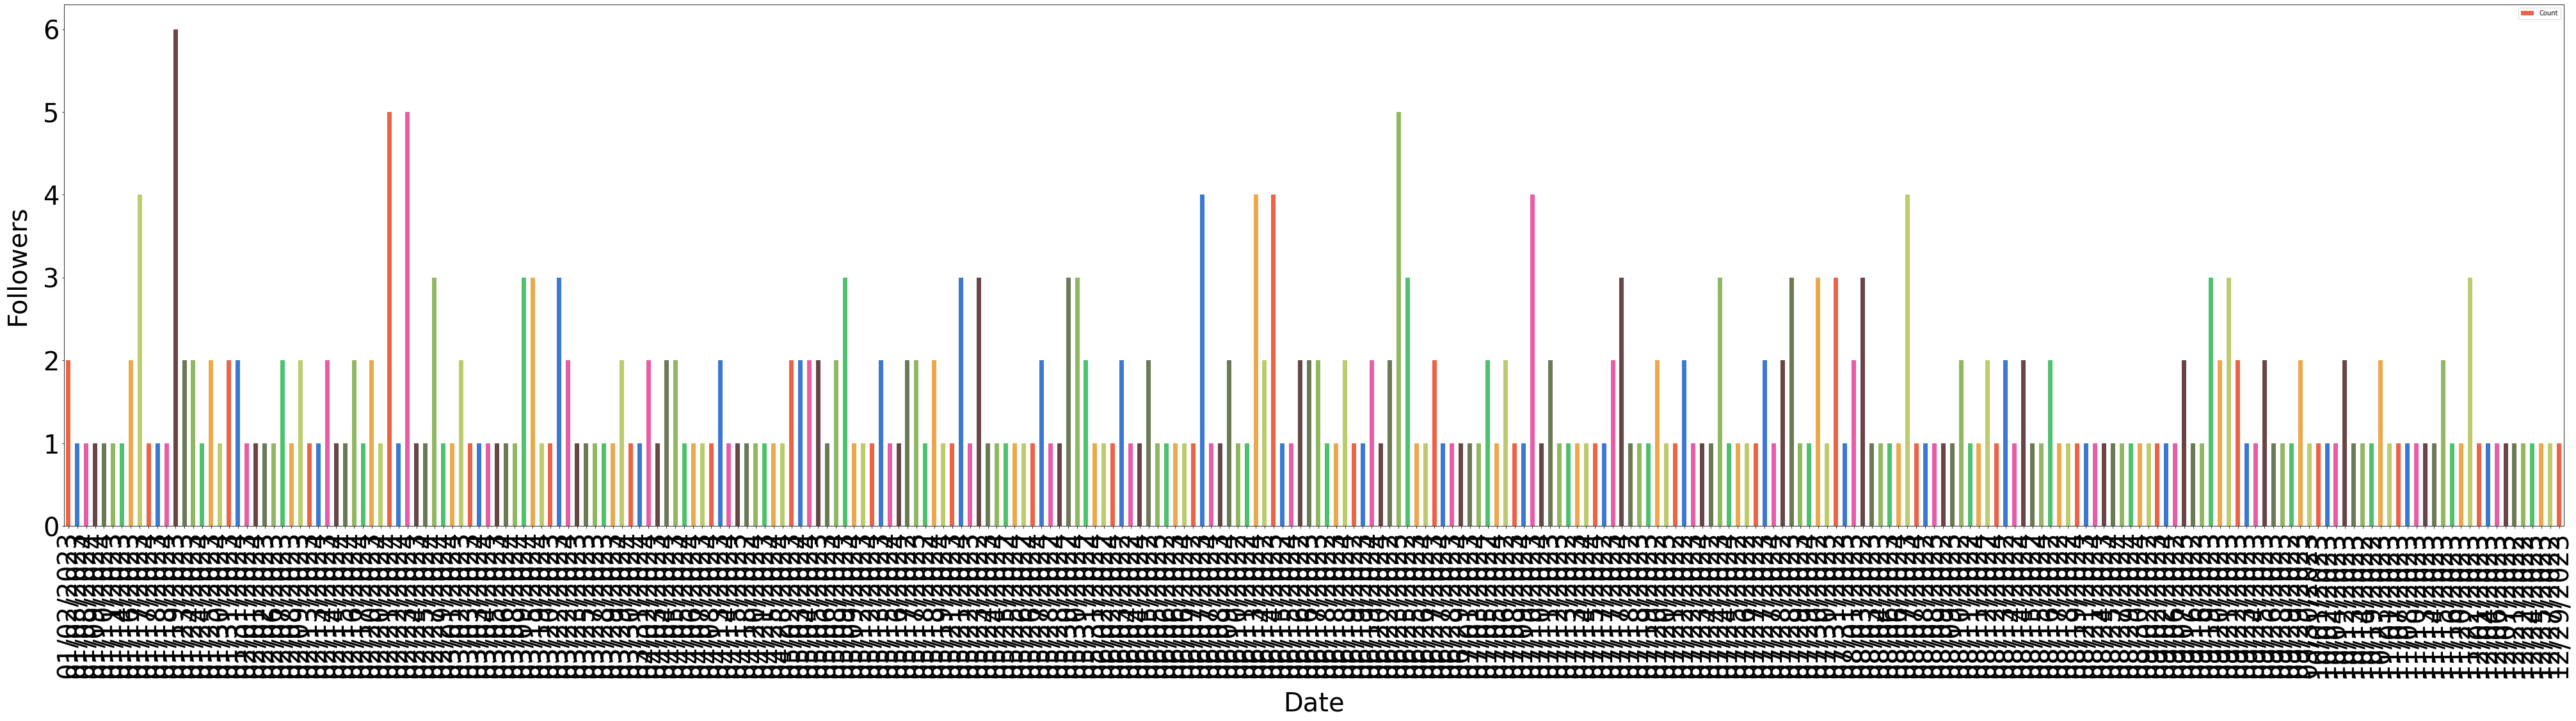

In [24]:
my_colors = list(islice(colors, None, len(VoteDateDF)))
VoteDateDF.plot.bar(x="FollowDate", y="Count", rot=90 , figsize=(70,15), color=my_colors)

plt.xlabel('Date', fontsize=40, labelpad=20)
plt.ylabel('Followers', fontsize=40, labelpad=20)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.show()

# Enjoy